In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



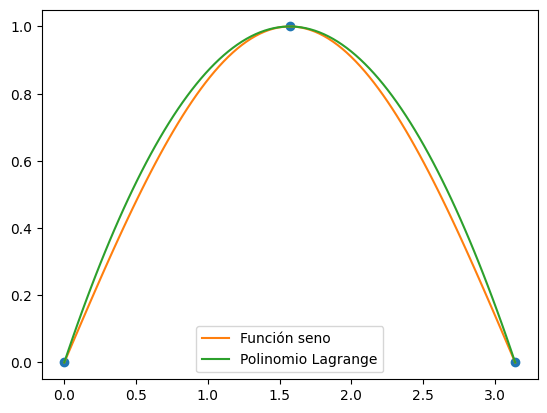

In [ ]:
#Aqui va su código
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import BarycentricInterpolator  #Newton
from scipy.interpolate import CubicHermiteSpline  #Hermite

def Error_lagrange(x_, f):
    n = len(x_)
    x = sp.Symbol('x')
    df = sp.diff(f, x, n)
    df = sp.lambdify(x, df)
    x_interp = np.linspace(min(x_), max(x_), 100)
    error = np.zeros(len(x_interp))
    for j in range(len(x_interp)):
        prod = 1
        for k in range(n):
            prod *= (x_interp[j] - x_[k])
        error[j] = 1/math.factorial(n+1)*df(x_interp[j])*prod
    return error

#Arrays
x_valores = np.array([0,np.pi/2,np.pi])
y_valores = np.array([0,1,0])
x_ = np.linspace(0,np.pi,100)

#Funciones
seno = lambda x: np.sin(x)
x = sp.symbols('x')
sen = sp.sin(x)

derivada = sp.diff(sen, x, 4)  #Cuarta erivada
derivada_np = sp.lambdify(x, derivada, 'numpy')
P = lagrange(x_valores,y_valores)  #Polinomio lagrange

error = Error_lagrange(x_valores,sen)
error_normal = seno(x_)-P(x_)

plt.plot(x_valores, y_valores, "o")
plt.plot(x_, seno(x_), label="Función seno")
plt.plot(x_, P(x_), label="Polinomio Lagrange")
plt.legend()


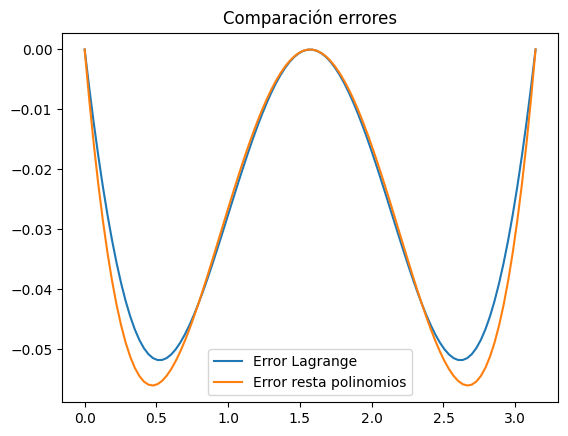

In [ ]:
plt.title("Comparación errores")
plt.plot(x_,error, label="Error Lagrange")
plt.plot(x_,error_normal, label="Error resta polinomios")
plt.legend()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

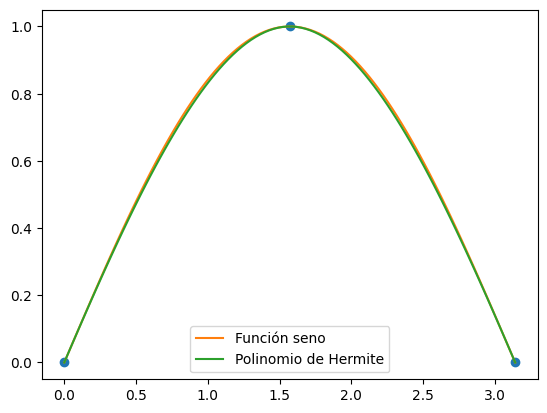

In [ ]:

def Error_Hermite(x_, f):
    n = len(x_)
    x = sp.Symbol('x')
    df_n = sp.diff(f, x, 2*n + 2)
    df_n = sp.lambdify(x, df_n, "numpy")
    x_interp = np.linspace(min(x_), max(x_), 100)
    error = np.zeros(len(x_interp))
    for j in range(len(x_interp)):
        prod = 1
        for i in range(n):
            prod *= (x_interp[j] - x_[i])**2
        error[j] = 1/math.factorial(2*n+2)*df_n(x_interp[j])*prod
    return error


f = lambda x: np.cos(x)
derivadas = f(x_valores)
hermite_poly = CubicHermiteSpline(x_valores, y_valores, derivadas)

error2 = Error_Hermite(x_valores,sen)
error_normal2 = seno(x_)-hermite_poly(x_)

plt.plot(x_valores, y_valores, "o")
plt.plot(x_, seno(x_), label="Función seno")
plt.plot(x_, hermite_poly(x_), label="Polinomio de Hermite")
plt.legend()

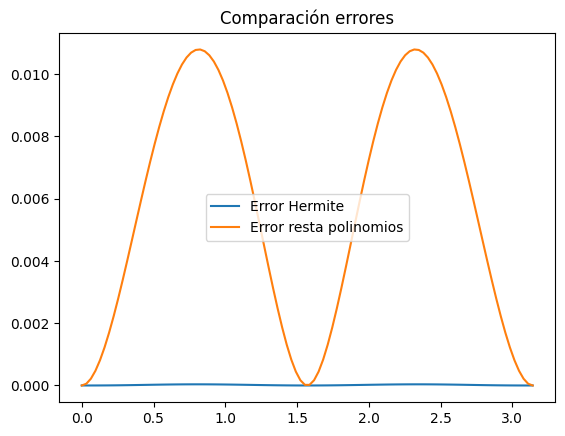

In [ ]:
plt.plot(x_,error2,label="Error Hermite")
plt.plot(x_,error_normal2,label="Error resta polinomios")
plt.title("Comparación errores")
plt.legend()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
E  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
x_vals = np.linspace(0,200,100)

In [ ]:
#Valor de sigma sub cero
xk = 83.5*((75-78)**2+55**2/4)
xk

63898.375

In [ ]:
#a)
E  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
x_vals = np.linspace(0,200,100)

f_ = 63898.375/((x-78)**2+(55**2)/4)
f = sp.lambdify(x, f_, 'numpy')
df_ = sp.diff(f_, x)
df = sp.lambdify(x, df_, 'numpy')

P = lagrange(E,sigma_exp)
newton = BarycentricInterpolator(E,sigma_exp)
hermite = CubicHermiteSpline(E,sigma_exp,df(E))


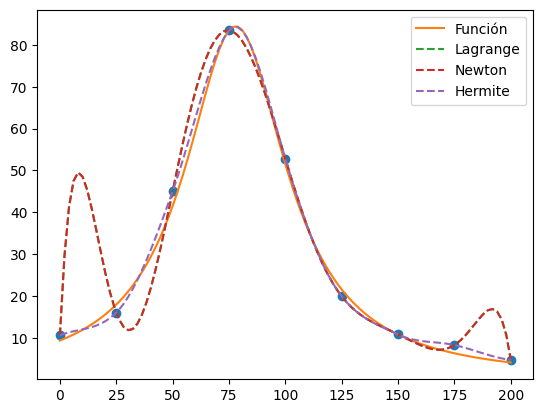

In [ ]:
#b)
plt.plot(E,sigma_exp,"o")
plt.plot(x_vals, f(x_vals), label="Función")
plt.plot(x_vals, P(x_vals), "--", label="Lagrange")
plt.plot(x_vals, newton(x_vals), "--", label="Newton")
plt.plot(x_vals, hermite(x_vals), "--", label="Hermite")
plt.legend()

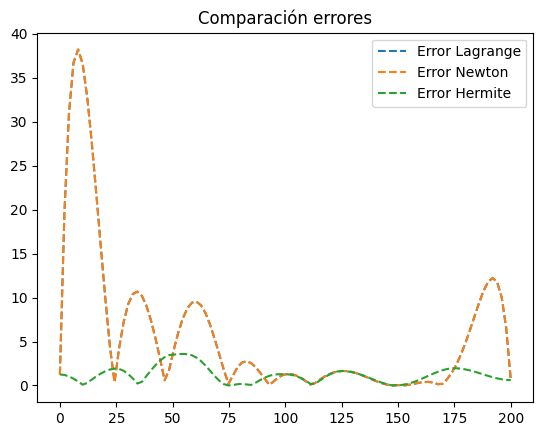

In [ ]:
#c)
error_normal_lagrange = abs(f(x_vals)-P(x_vals))
error_normal_newton = abs(f(x_vals)-newton(x_vals))
error_normal_hermite = abs(f(x_vals)-hermite(x_vals))

plt.plot(x_vals, error_normal_lagrange, "--", label="Error Lagrange")
plt.plot(x_vals, error_normal_newton, "--", label="Error Newton")
plt.plot(x_vals, error_normal_hermite, "--", label="Error Hermite")
plt.title("Comparación errores")
plt.legend()

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

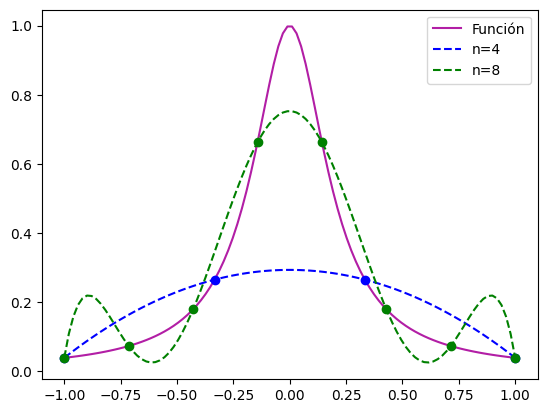

In [ ]:
#Funcion
f = 1/(1+25*x**2)
f_ = sp.lambdify(x, f, 'numpy')
df = sp.diff(f, x)
df = sp.lambdify(x, df, 'numpy')

#Valores de x
x_ = np.linspace(-1,1,100)

#Arreglos
x1 = np.linspace(-1,1,4)
x2 = np.linspace(-1,1,8)
x3 = np.linspace(-1,1,12)
x4 = np.linspace(-1,1,16)
x5 = np.linspace(-1,1,20)

y1 = f_(x1)
y2 = f_(x2)
y3 = f_(x3)
y4 = f_(x4)
y5 = f_(x5)

p1 = lagrange(x1,y1)
p2 = lagrange(x2,y2)
p3 = lagrange(x3,y3)
p4 = lagrange(x4,y4)
p5 = lagrange(x5,y5)


#a)
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p1(x_), "--", label="n=4", color="blue")
plt.plot(x1,y1,"o", color="blue")
plt.plot(x_, p2(x_), "--", label="n=8",color="green")
plt.plot(x2,y2,"o", color="green")
plt.legend()

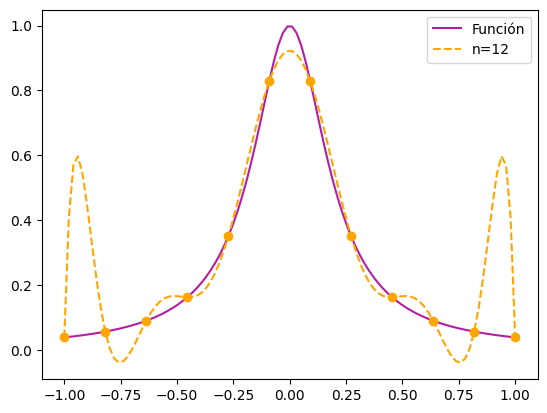

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p3(x_), "--", label="n=12", color="orange")
plt.plot(x3,y3,"o", color="orange")
plt.legend()

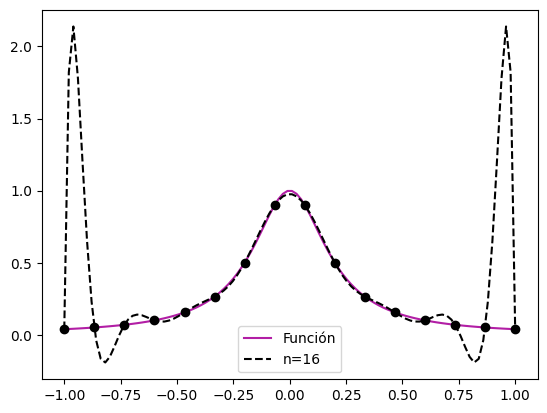

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p4(x_), "--", label="n=16", color="black")
plt.plot(x4,y4,"o", color="black")
plt.legend()

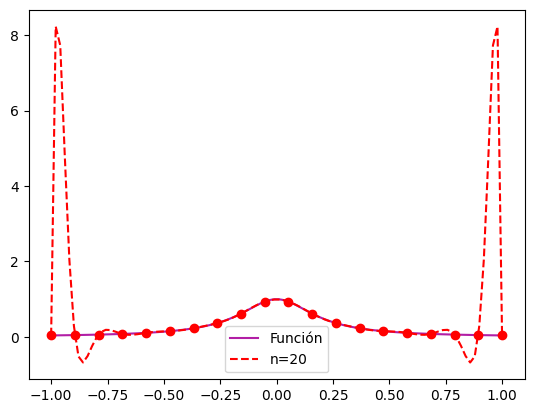

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p5(x_), "--", label="n=20", color="red")
plt.plot(x5,y5,"o", color="red")
plt.legend()

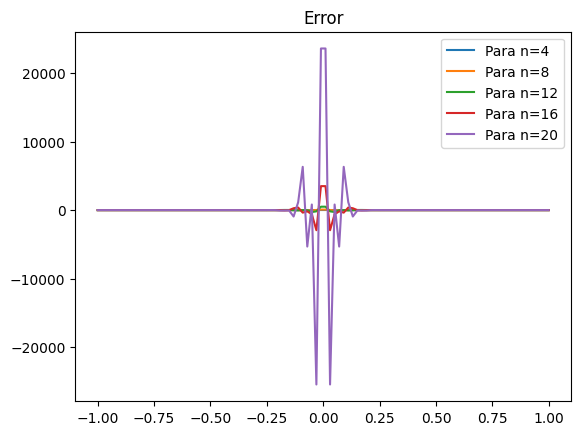

In [ ]:
#b)
error_normal_lagrange = f_(x_) - p1(x_)
plt.plot(x_,Error_lagrange(x1,f), label="Para n=4")
plt.plot(x_,Error_lagrange(x2,f), label="Para n=8")
plt.plot(x_,Error_lagrange(x3,f), label="Para n=12")
plt.plot(x_,Error_lagrange(x4,f), label="Para n=16")
plt.plot(x_,Error_lagrange(x5,f), label="Para n=20")
plt.title("Error")
plt.legend()

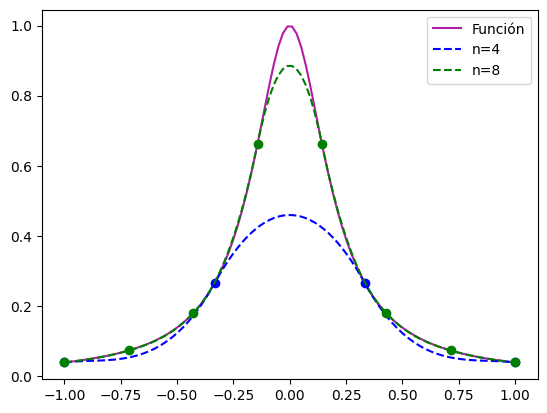

In [ ]:
#c)
#Polinomios de hermite
p1h = CubicHermiteSpline(x1,y1,df(x1))
p2h = CubicHermiteSpline(x2,y2,df(x2))
p3h = CubicHermiteSpline(x3,y3,df(x3))
p4h = CubicHermiteSpline(x4,y4,df(x4))
p5h = CubicHermiteSpline(x5,y5,df(x5))

plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p1h(x_), "--", label="n=4", color="blue")
plt.plot(x1,y1,"o", color="blue")
plt.plot(x_, p2h(x_), "--", label="n=8",color="green")
plt.plot(x2,y2,"o", color="green")
plt.legend()

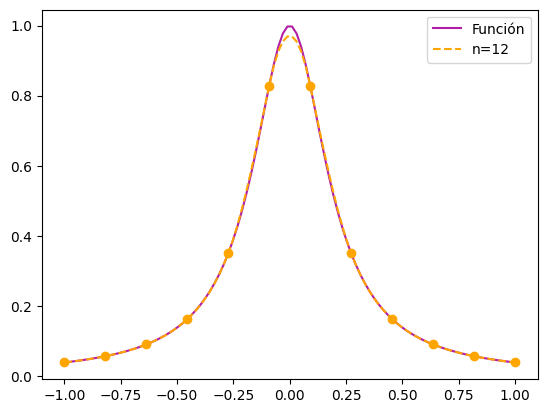

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p3h(x_), "--", label="n=12", color="orange")
plt.plot(x3,y3,"o", color="orange")
plt.legend()

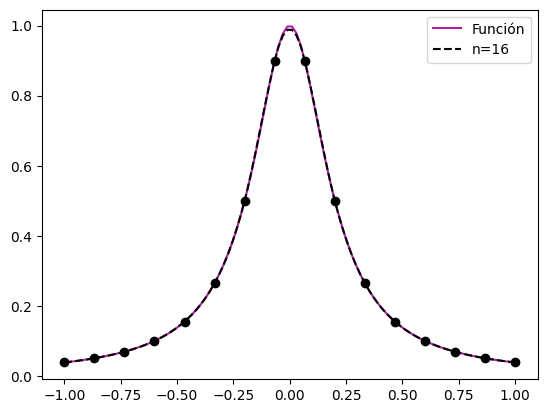

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p4h(x_), "--", label="n=16", color="black")
plt.plot(x4,y4,"o", color="black")
plt.legend()

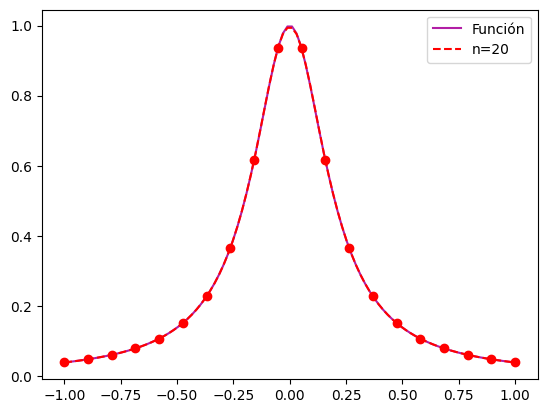

In [ ]:
plt.plot(x_, f_(x_), label="Función", color="#b21ea5")
plt.plot(x_, p5h(x_), "--", label="n=20", color="red")
plt.plot(x5,y5,"o", color="red")
plt.legend()

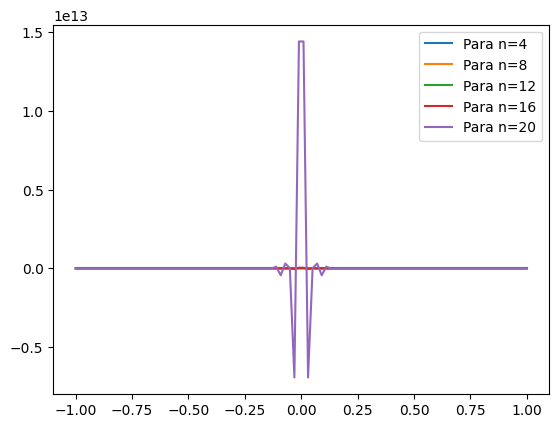

In [ ]:
plt.plot(x_,Error_Hermite(x1,f), label="Para n=4")
plt.plot(x_,Error_Hermite(x2,f), label="Para n=8")
plt.plot(x_,Error_Hermite(x3,f), label="Para n=12")
plt.plot(x_,Error_Hermite(x4,f), label="Para n=16")
plt.plot(x_,Error_Hermite(x5,f), label="Para n=20")
plt.legend()

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



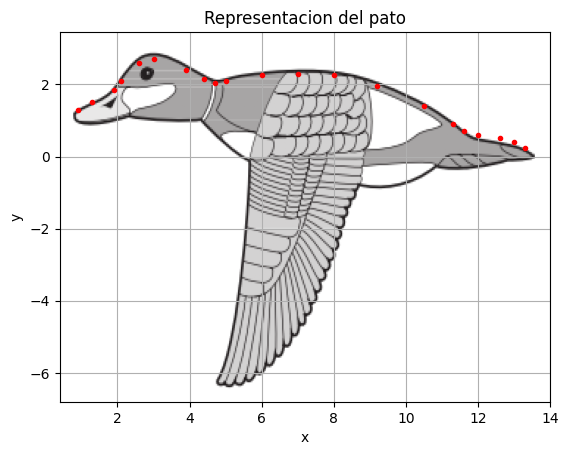

In [ ]:
#1)
import urllib.request
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

#2)
# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

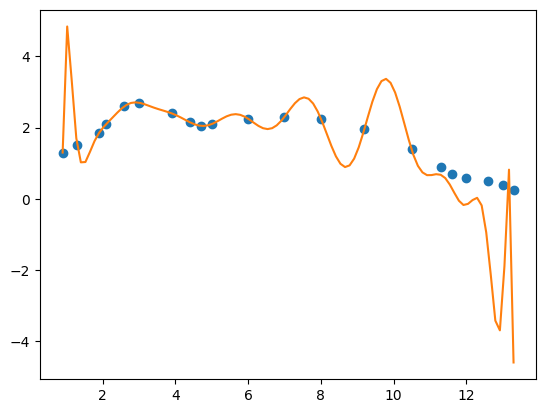

In [ ]:
#3)
x_ = np.linspace(min(xp),max(xp),100)
P = lagrange(xp,yp)

plt.plot(xp, yp, "o")
plt.plot(x_, P(x_))

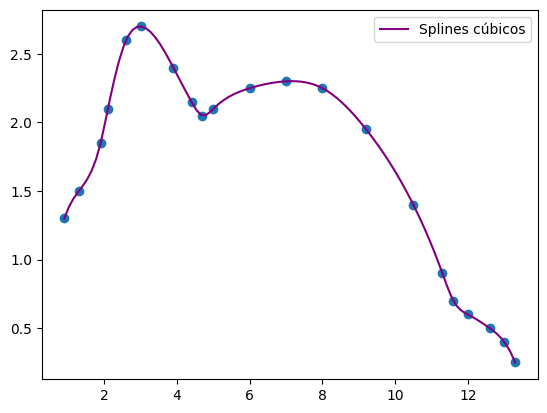

In [ ]:
#4)
from scipy.interpolate import CubicSpline
spline = CubicSpline(xp, yp)
plt.plot(xp, yp, "o")
plt.plot(x_, spline(x_), color="purple", label="Splines cúbicos")
plt.legend()

5. La interpolación con el método de lagrange presenta oscilaciones debido a que hay demasiados puntos, por lo que llega un punto en el que el polinomio no podrá pasar por todos ellos.